# Making an Abundance Plot
Another key plot is to compare the iron abundance, \[Fe/H\] , to an alpha-element like Mg. Selecting stars for this application requires two steps. First, selecting stars with reliable ASPCAP fits based on ASPCAPFLAG and also by removing errant values with a set of cuts. Second, it is adviseable to sub-select regions of the galaxy. As in the H-R diagram example, further refinement of this sample can come from merging different examples on this page.

In [1]:
import fitsio
from matplotlib import pyplot as plt
import numpy as np


## Read in the AllStar File

In [2]:
data = fitsio.read("./allStar-dr17-synspec.fits")

### Select Stars with Reliable Measurements
Here we will use the ASPCAPFLAG bit 23 that represents STAR_BAD.

In [3]:
starbad = 2**23
gd1 = np.bitwise_and(data["ASPCAPFLAG"], starbad) == 0
#ind = np.where(gd)
#data = data[ind]

### Select Samples toward the Inner and Outer Galaxy using (l,b)
To compare the inner and outer galaxy, we need to do a few things:
- restrict the sample to stars of the same stellar type (e.g., giants or dwarfs)
- select based on the location in the sky
- restrict the same to stars with precise chemical abundances. 

In [4]:
gd = np.logical_and(data["LOGG"] < 4, gd1 )

# Select the Inner Galaxy using Galactic Latitude and Longitude
i_cut = np.logical_or(np.abs(data["GLON"])>=350, data["GLON"]<=10)
l_bsmall_check = np.logical_and(np.abs(data["GLAT"])<5, i_cut)

# Select the Outer Galaxy using Galactic Latitude and Longitude
o_cut = np.logical_and(np.abs(data["GLON"])>90, data["GLON"]<270)
l_bbig_check = np.logical_and(np.abs(data["GLAT"])<10, o_cut)

# Apply criteria for the abundances
abun_good = np.logical_and(data["FE_H_ERR"]<0.05, data["MG_FE_ERR"]<0.05)

# Combine the samples defined above
l_bsmall_Feh_check = np.logical_and(l_bsmall_check, abun_good)
l_bbig_Feh_check = np.logical_and(l_bbig_check, abun_good)
ind_1 = np.where(np.logical_and(gd, l_bsmall_Feh_check))
ind_2 = np.where(np.logical_and(gd, l_bbig_Feh_check))

# Make separate arrays 
good1 = data[ind_1]
good2 = data[ind_2]

# Create the Plotting Arrays
alpha1 = good1["MG_FE"]
FeH1= good1["FE_H"]

alpha2= good2["MG_FE"]
FeH2 = good2["FE_H"]

### Plotting

Text(0.5, 1.0, 'Outer Galaxy')

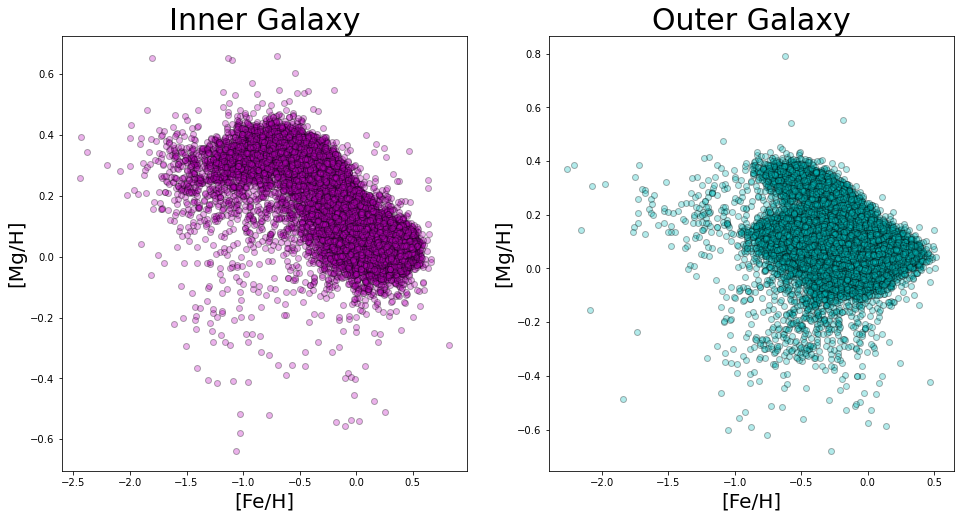

In [5]:
fig = plt.figure(figsize=(16,8))

ax1 = fig.add_subplot(121)
image1 = ax1.scatter(FeH1, alpha1, c="m" ,edgecolor='k',alpha=0.3)
ax1.set_xlabel("[Fe/H]", size=20)
ax1.set_ylabel("[Mg/H]", size=20)
ax1.set_title("Inner Galaxy", size=30)

ax2 = fig.add_subplot(122)
image2 = ax2.scatter(FeH2, alpha2, c="c", edgecolor='k', alpha=0.3)
ax2.set_xlabel("[Fe/H]", size=20)
ax2.set_ylabel("[Mg/H]", size=20)
ax2.set_title("Outer Galaxy", size=30)
#plt.savefig("alpha_fe.png")